<a href="https://colab.research.google.com/github/Sukyeong02/24-1-AI/blob/main/11_3_RNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Dropout,Activation
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

첫 번째 학습셋 입력:  유시민 검찰도 사법도 썩었지 vs 진중권 유시민 망상 대중은 현실로 믿어
첫 번째 테스트셋 입력:  박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
첫 번째 학습셋 결과 one-hot출력: [1. 0. 0. 0.]
첫 번째 테스트 셋 결과 one-hot출력: [1. 0. 0. 0.]
첫 번째 학습셋 토큰 결과: [238, 7160, 7161, 7162, 122, 404, 238, 7163, 7164, 4269, 4270]
첫 번째 테스트셋 토큰 결과: [1200]
학습셋 제목 최대 길이:  18
테스트셋 제목 최대 길이:  10
전체 데이터셋 단어 토큰 개수:  22844
첫 번째 학습셋 패딩 토큰:  [   0    0    0  238 7160 7161 7162  122  404  238 7163 7164 4269 4270]
첫 번째 테스트셋 패딩 토큰:  [   0    0    0    0    0    0    0    0    0    0    0    0    0 1200]
Epoch 1/5
313/313 [==============================] - 11s 23ms/step - loss: 1.2701 - accuracy: 0.3588 - val_loss: 1.3888 - val_accuracy: 0.4045
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 0.8758 - accuracy: 0.6132 - val_loss: 1.6966 - val_accuracy: 0.3652
Epoch 3/5
313/313 [==============================] - 3s 10ms/step - loss: 0.6817 - accuracy: 0.7216 - val_loss: 1.8689 - val_accuracy: 0.4382
Epoch 4/5
313/313 [==============================] - 3

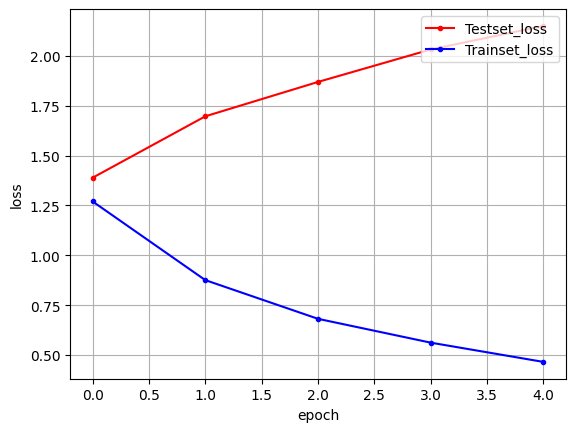

In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

train_data = pd.read_csv("/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/train_SectionDataset.csv", header=0, names=['title','section'])
X_train = train_data['title']
Y_train = train_data['section']
test_data = pd.read_csv("/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/test_SectionDataset.csv", header=0)
X_test = test_data['title']
Y_test = test_data['section']

print("첫 번째 학습셋 입력: ", X_train[0])
print("첫 번째 테스트셋 입력: ", X_test[0])
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("첫 번째 학습셋 결과 one-hot출력:", Y_train_onehot[0])
print("첫 번째 테스트 셋 결과 one-hot출력:", Y_test_onehot[0])

from keras.preprocessing.text import text_to_word_sequence
from numpy import array

token = Tokenizer()
token.fit_on_texts(X_train)
# print(token.word_index)
x = token.texts_to_sequences(X_train)
x1 = token.texts_to_sequences(X_test)
print("첫 번째 학습셋 토큰 결과:", x[0])
print("첫 번째 테스트셋 토큰 결과:", x1[0])

padded_X_train = pad_sequences(x, 14)
padded_X_test = pad_sequences(x1, 14)

max_train = 0
max_test = 0

for i in x:
  if len(i) > max_train:
    max_train = len(i)

for i in x1:
  if len(i) > max_test:
    max_test = len(i)

print("학습셋 제목 최대 길이: ", max_train)
print("테스트셋 제목 최대 길이: ", max_test)

word_size = len(token.word_index) +1
print("전체 데이터셋 단어 토큰 개수: ", word_size)

print("첫 번째 학습셋 패딩 토큰: ", padded_X_train[0])
print("첫 번째 테스트셋 패딩 토큰: ", padded_X_test[0])

model = Sequential()
model.add(Embedding(word_size, 8, input_length=14))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_X_train, Y_train_onehot, epochs=5, validation_data=(padded_X_test, Y_test_onehot))
print("Accuracy: %.4f" % (model.evaluate(padded_X_test, Y_test_onehot)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
prediction = model.predict(padded_X_train)
predicted_classes = np.argmax(prediction, axis=1)

for i in range(len(X_test)):
  print("Index:", i, "실제 문장:", X_test[i])
  print("padded sequence: ", padded_X_test[i])
  print("예측 결과: ", prediction[i])
  print("Actual Section: ", Y_test[i], "Expected Section: ", predicted_classes[i], '\n')

313/313 [==============================] - 1s 2ms/step
Index: 0 실제 문장: 박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
padded sequence:  [   0    0    0    0    0    0    0    0    0    0    0    0    0 1200]
예측 결과:  [9.1534871e-01 4.5610286e-04 8.4186122e-02 9.0990670e-06]
Actual Section:  0 Expected Section:  0 

Index: 1 실제 문장: 박준영 아내 도자기 의혹 사과...카페 운영 중단
padded sequence:  [    0     0     0     0     0     0     0     0  1359   359 11567  6036
   284   128]
예측 결과:  [0.03025679 0.61974144 0.28096655 0.0690352 ]
Actual Section:  0 Expected Section:  1 

Index: 2 실제 문장: 배우자 도자기 의혹 박준영 해당 카페 운영 않을 계획
padded sequence:  [   0    0    0    0    0    0    0    0  359 6024 6036  284 1427 2118]
예측 결과:  [7.7698082e-02 1.6520133e-02 9.0563285e-01 1.4895946e-04]
Actual Section:  0 Expected Section:  2 

Index: 3 실제 문장: 박준영 도자기 밀수입 의혹 샹드리에 8개 궁궐에 살았나?
padded sequence:  [   0    0    0    0    0    0    0    0    0    0    0    0  359 5701]
예측 결과:  [4.2085598e-05 3.0344391e-02 5.1412135e-05 9.6956211e-01]
Actual S